**Задача.** Необходимо загрузить и обработать предложенный датасет(Титаник), провести аналитику данных с помощью фреймворка Python Pandas, визуализировать результаты аналитики.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

1. Загрузка датасета

In [ ]:
url = 'https://drive.google.com/file/d/16MAuRsO7t_0hjWJPp4YN7cojyo3TA60p/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id=' + url.split('/')[-2]
TitanicDB = pd.read_csv(path)
TitanicDB.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


2. Определение количества пустых ячеек.

In [ ]:
TitanicDB.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
TitanicDB.isnull().sum().sum()

866

In [ ]:
# NoNull=TitanicDB.dropna()
# NoNull

In [ ]:
TitanicDB.dtypes #Для сведения проверяем типы данных в нашем датафрейме

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

3. Заполнение пустых ячеек.
Для столбца с возрастом Age выбрана замена на среднее значение, для ячеек столбцов номера каюты Cabin и порта посадки Embarked выбрана замена на значение строки 'Null', что бы в дальнейшем при необходимости было видно, где необходимо доработать датафрейм.

In [ ]:
TitanicDB = TitanicDB.fillna({'Age': TitanicDB['Age'].mean(), 'Cabin':'Null',
                 'Embarked':'Null'})
TitanicDB.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

4. Находим количество уникальных значений для каждого столбца.

In [ ]:
number_unique = TitanicDB.nunique()
number_unique

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          148
Embarked         4
dtype: int64

5. Находим количество минимальное значение (только для цифровых значений) для каждого столбца.

In [ ]:
min_value = TitanicDB.min(numeric_only=True)
min_value

PassengerId    1.00
Survived       0.00
Pclass         1.00
Age            0.42
SibSp          0.00
Parch          0.00
Fare           0.00
dtype: float64

6. Находим количество максимальное значение (только для цифровых значений) для каждого столбца.

In [ ]:
max_value = TitanicDB.max(numeric_only=True)
max_value

PassengerId    891.0000
Survived         1.0000
Pclass           3.0000
Age             80.0000
SibSp            8.0000
Parch            6.0000
Fare           512.3292
dtype: float64

7. Для наглядности построим графики зависимости признаков датафрейма.

Постараемся рассмотреть варианты, отличающиеся от ДЗ №5.

7.1 Влияние возраста на количество выживщих.

Для начала определим количество (повторно) уникальных значений, что бы в дальнейшем организовать ось Х.

In [ ]:
age = pd.Series(sorted(TitanicDB['Age'].unique()))
age

0      0.42
1      0.67
2      0.75
3      0.83
4      0.92
      ...  
84    70.00
85    70.50
86    71.00
87    74.00
88    80.00
Length: 89, dtype: float64

Строим график с распределением возрастов на интервалы по 10 лет.

<Axes: title={'center': 'Зависимость выживших от возраста'}, xlabel='Возраст, лет', ylabel='Количество'>

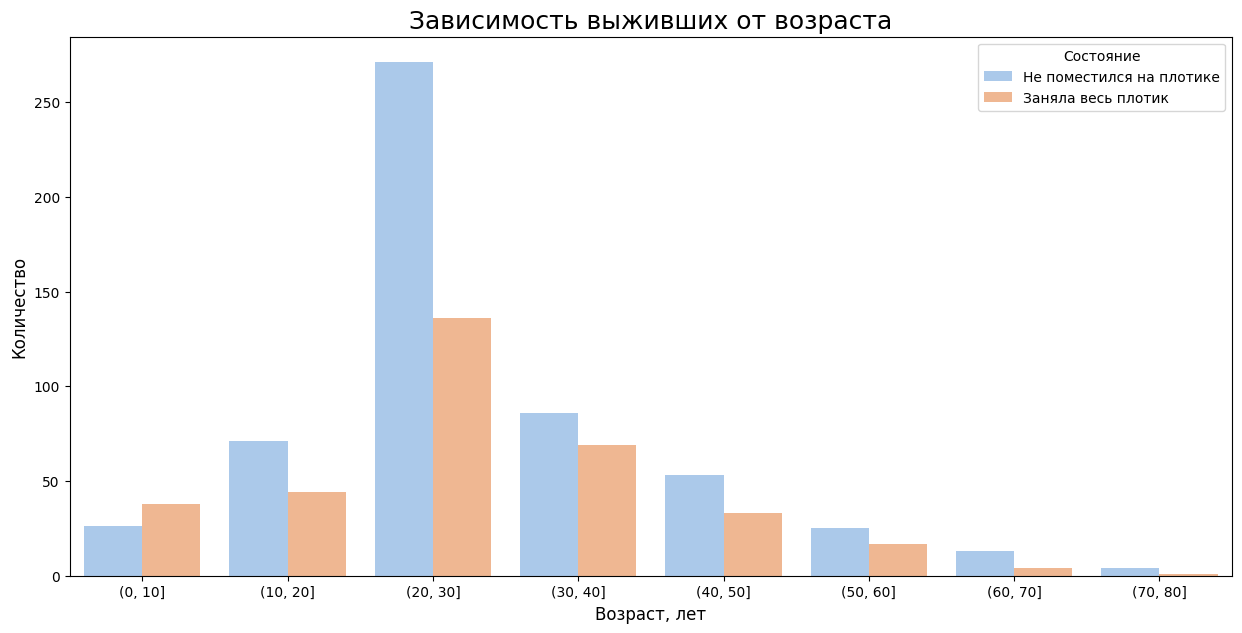

In [ ]:
countplt, ax = plt.subplots(figsize = (15,7))
bins_num = [0, 10, 20, 30, 40, 50, 60, 70, 80]
TitanicDB['AgeGroup'] = pd.cut(TitanicDB['Age'], bins=bins_num)
ax = sns.countplot(x='AgeGroup', hue='Survived',  data=TitanicDB, palette='pastel')
ax.set_title('Зависимость выживших от возраста',fontsize = 18)
ax.legend(labels = ['Не поместился на плотике', 'Заняла весь плотик'], title = ('Состояние'))
ax.set_xlabel('Возраст, лет', fontsize = 12)
ax.set_ylabel('Количество', fontsize = 12)
ax

7.2 Зависимость цены билета от пола.

Для начала определим количество (повторно) уникальных значений, что бы в дальнейшем организовать ось Х.

In [ ]:
fare = pd.Series(sorted(TitanicDB['Fare'].unique()))
fare

0        0.0000
1        4.0125
2        5.0000
3        6.2375
4        6.4375
         ...   
243    227.5250
244    247.5208
245    262.3750
246    263.0000
247    512.3292
Length: 248, dtype: float64

Строим график с распределением возрастов на интервалы по 10 лет.

Text(0, 0.5, 'Количество')

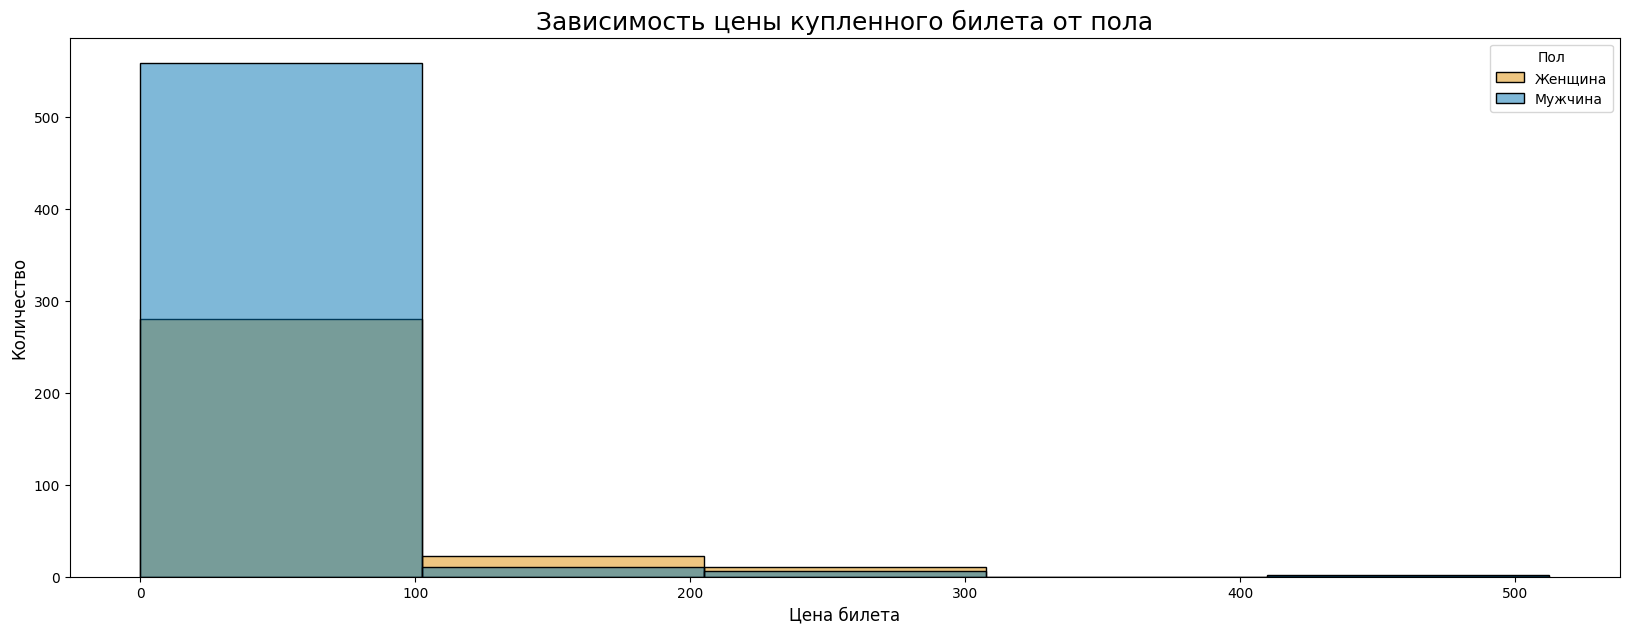

In [ ]:
countplt, ax = plt.subplots(figsize = (20,7))
ax = sns.histplot(data=TitanicDB, x='Fare', hue='Sex', bins = 5, palette='colorblind')
ax.set_title('Зависимость цены купленного билета от пола',fontsize = 18)
ax.legend(labels = ['Женщина', 'Мужчина'], title = ('Пол'))
ax.set_xlabel('Цена билета', fontsize = 12)
ax.set_ylabel('Количество', fontsize = 12)

Среди покупателей самых дешевых билетов преобладают мужчин, но в средней ценовой категории среди покупателей преобладают женщины.

С учетом итогов ДЗ №5 можно сделать гипотезу, что среди выживших преобладают женщины (цена билета больше всего влияла на выживаемость). Проверим в п. 7.3.

7.3 Зависимость выживания от пола.

Для начала обращаем внимание, на то чо выжил или нет пассажир обозначено бинарной системой - 0 - не выжил, 1 - выжил. Необходимо заменить в датафрейме цифры на соответтвующее описание.

Далее построим график

Text(0, 0.5, 'Количество')

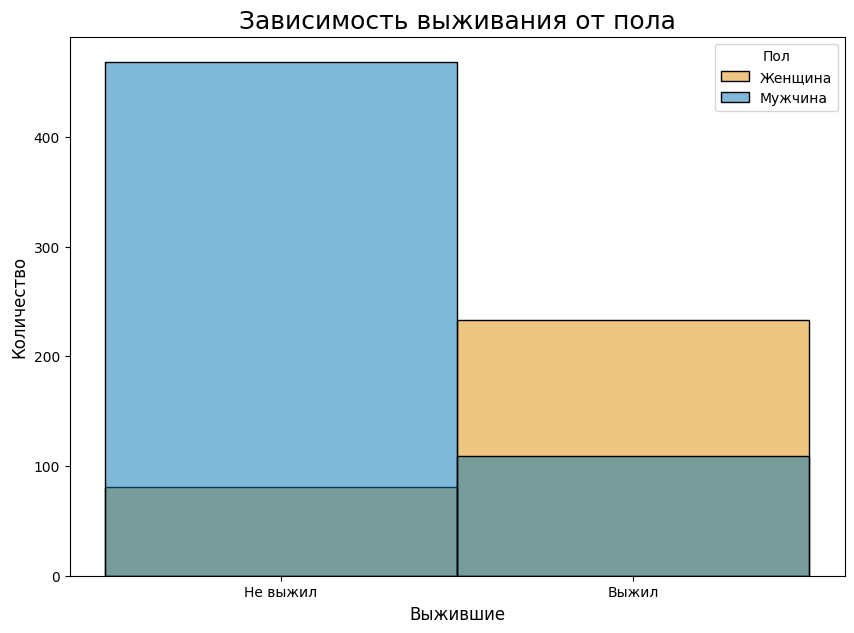

In [ ]:
countplt, ax = plt.subplots(figsize = (10,7))
SexDF = TitanicDB
SexDF['Survived'] = SexDF['Survived']. replace([0, 1], ['Не выжил', 'Выжил'])
ax = sns.histplot(data=SexDF, x='Survived', hue='Sex', bins = 5, palette='colorblind')
ax.set_title('Зависимость выживания от пола',fontsize = 18)
ax.legend(labels = ['Женщина', 'Мужчина'], title = ('Пол'))
ax.set_xlabel('Выжившие', fontsize = 12)
ax.set_ylabel('Количество', fontsize = 12)


Из диаграммы видно, что подавляющее большинство погибщих были мужчины, а подавляющее значение выживщих - женщины.

7.4 Для прмера создадим график типа Violin для зависимости количества родителей/детей от пола.

<Axes: xlabel='Parch', ylabel='Sex'>

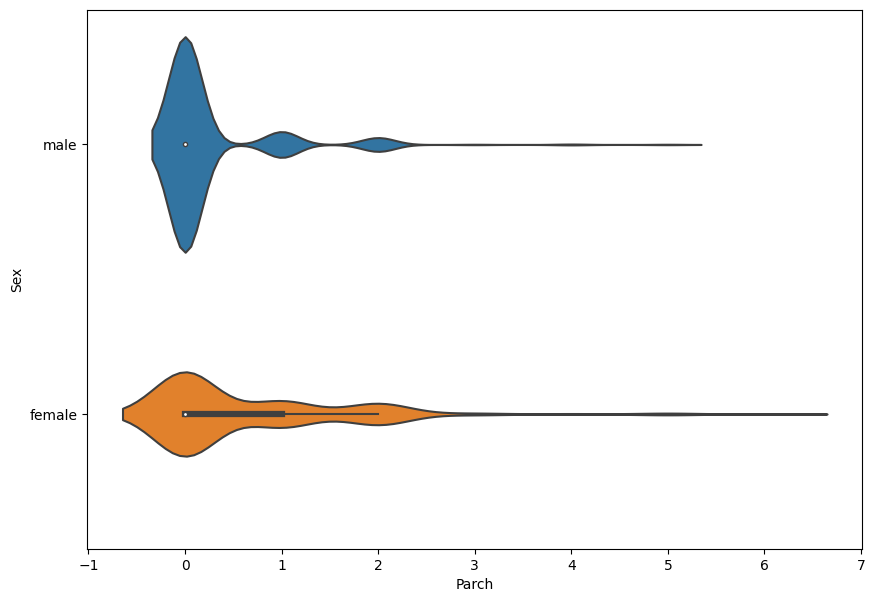

In [ ]:
countplt, ax = plt.subplots(figsize = (10,7))
sns.violinplot(x='Parch', y='Sex', data=TitanicDB)

Из графика можно сделать вывод, что  с детьми/родителями  в основном путешествовали женщины.